In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
company_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'JPM', 'GS', 'WMT', 'KO']
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

In [3]:
company_data = {}

for symbol in company_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    company_data[symbol] = df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-19,59.389999,60.099998,59.230000,59.990002,58.205509,12596200
2022-09-20,59.680000,60.029999,59.320000,59.900002,58.118187,11984600
2022-09-21,60.139999,60.700001,59.389999,59.400002,57.633057,14165300
2022-09-22,59.549999,59.730000,59.200001,59.259998,57.497223,11657600
2022-09-23,58.959999,59.099998,58.000000,58.599998,56.856850,14824000
...,...,...,...,...,...,...
2023-09-12,58.990002,59.000000,58.189999,58.299999,57.841103,12292700
2023-09-13,58.400002,58.680000,58.340000,58.439999,57.980000,12641400
2023-09-14,58.240002,58.590000,58.189999,58.459999,58.459999,12311600


In [5]:
company_models={}
for symbol, df in company_data.items():
    df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    X = df[['Close']]
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    company_models[symbol] = model

In [6]:
for symbol, df in company_data.items():
    model = company_models[symbol]
    X_test = df[['Close']].tail(1)  # Use the last closing price for testing
    y_test = df['Close'].tail(1)  # True value for the last day
    y_pred = model.predict(X_test)

    # Calculate and print evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Company: {symbol}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("\n")

Company: AAPL
MAE: 0.00
MSE: 0.00
RMSE: 0.00


Company: MSFT
MAE: 0.15
MSE: 0.02
RMSE: 0.15


Company: GOOGL
MAE: 0.08
MSE: 0.01
RMSE: 0.08


Company: AMZN
MAE: 0.41
MSE: 0.17
RMSE: 0.41


Company: TSLA
MAE: 2.05
MSE: 4.21
RMSE: 2.05


Company: NVDA
MAE: 1.12
MSE: 1.25
RMSE: 1.12


Company: JPM
MAE: 0.08
MSE: 0.01
RMSE: 0.08


Company: GS
MAE: 0.31
MSE: 0.09
RMSE: 0.31


Company: WMT
MAE: 0.09
MSE: 0.01
RMSE: 0.09


Company: KO
MAE: 0.04
MSE: 0.00
RMSE: 0.04




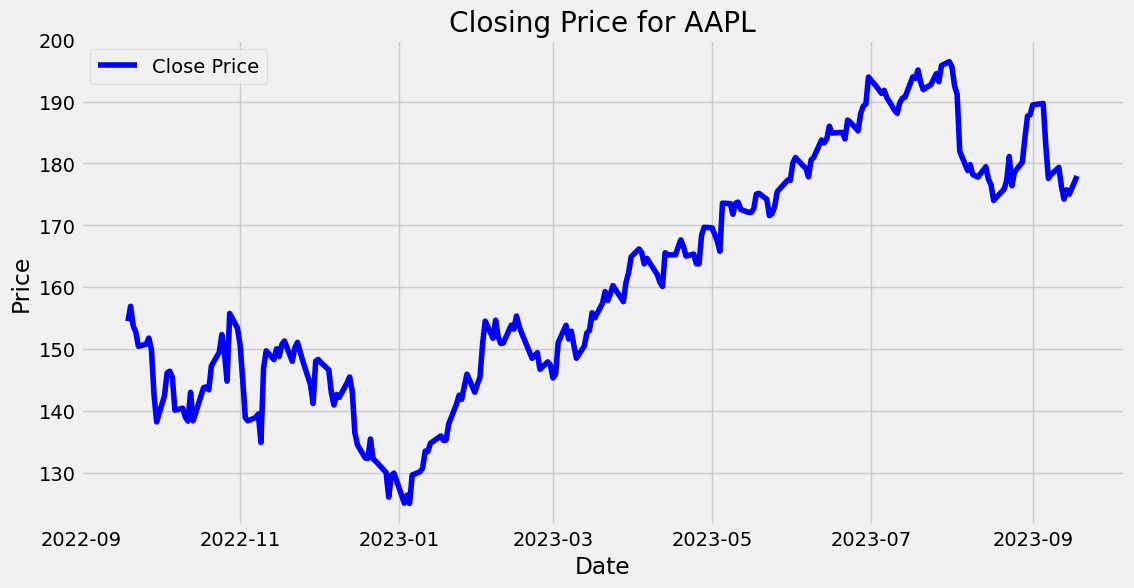

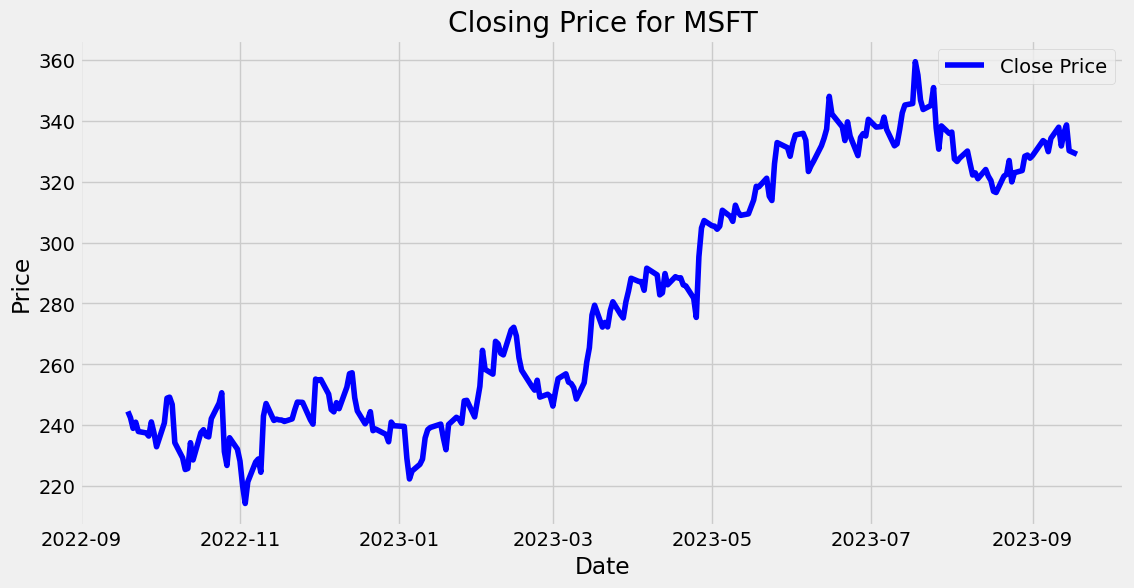

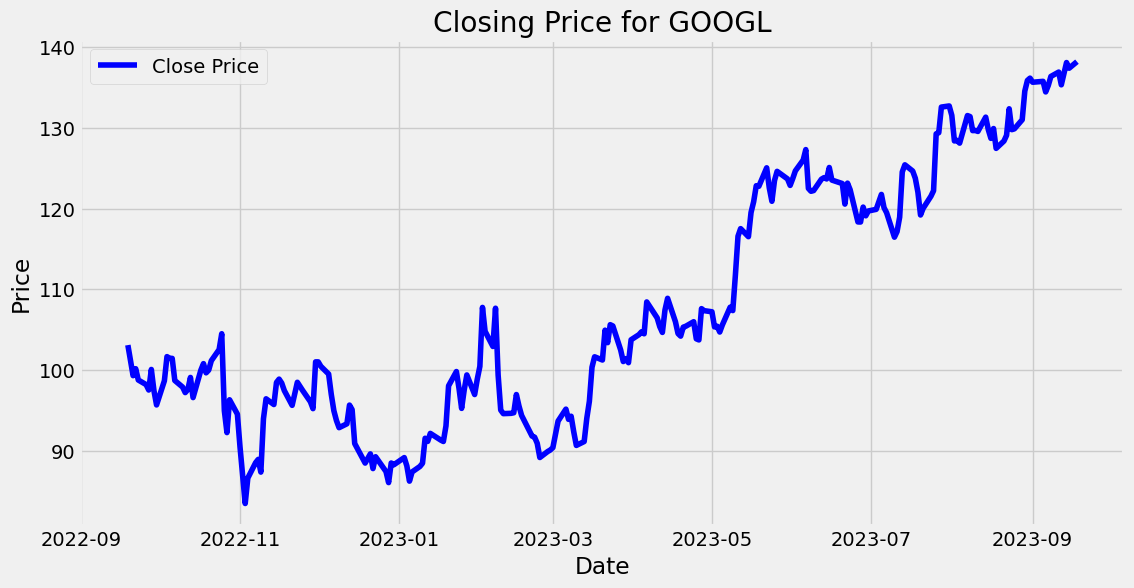

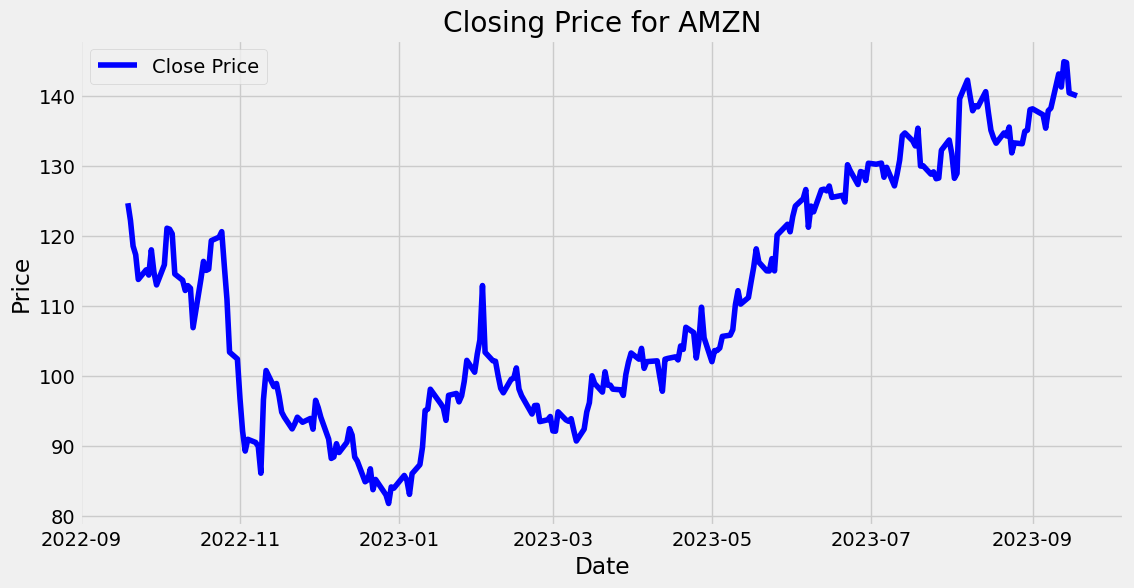

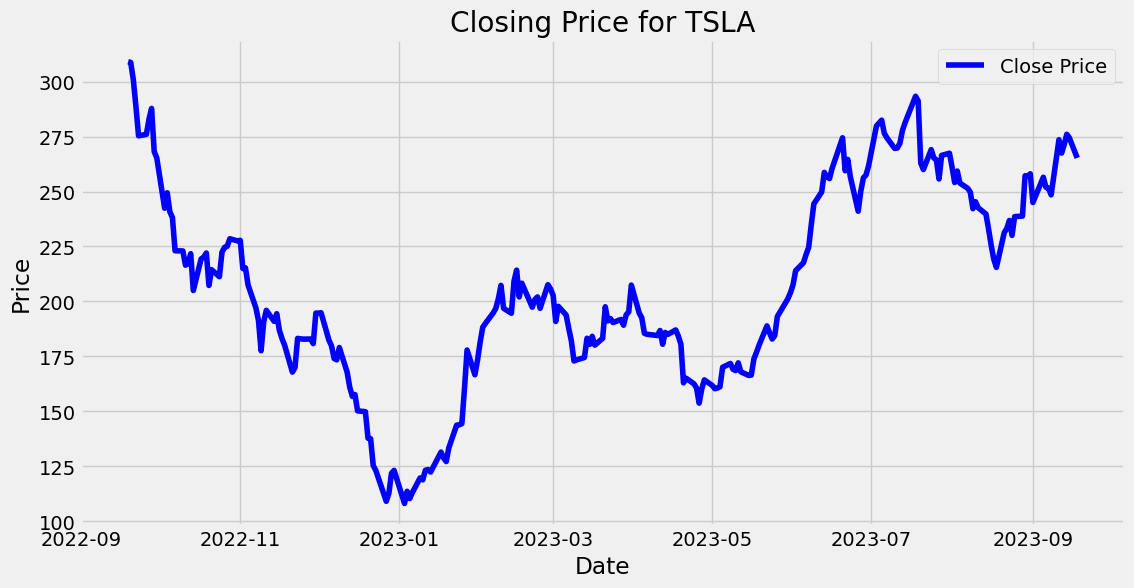

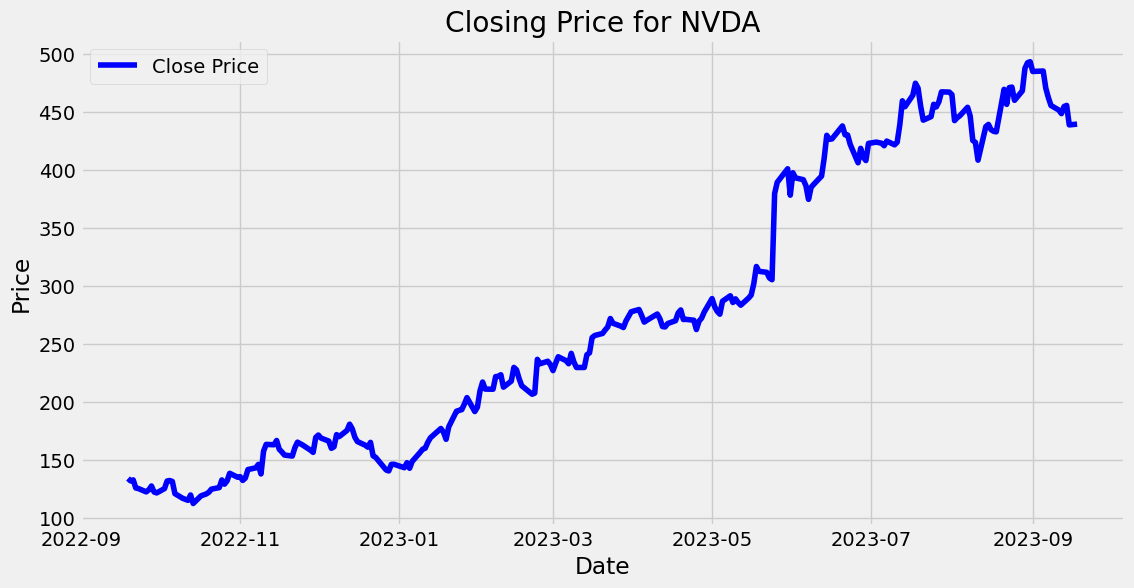

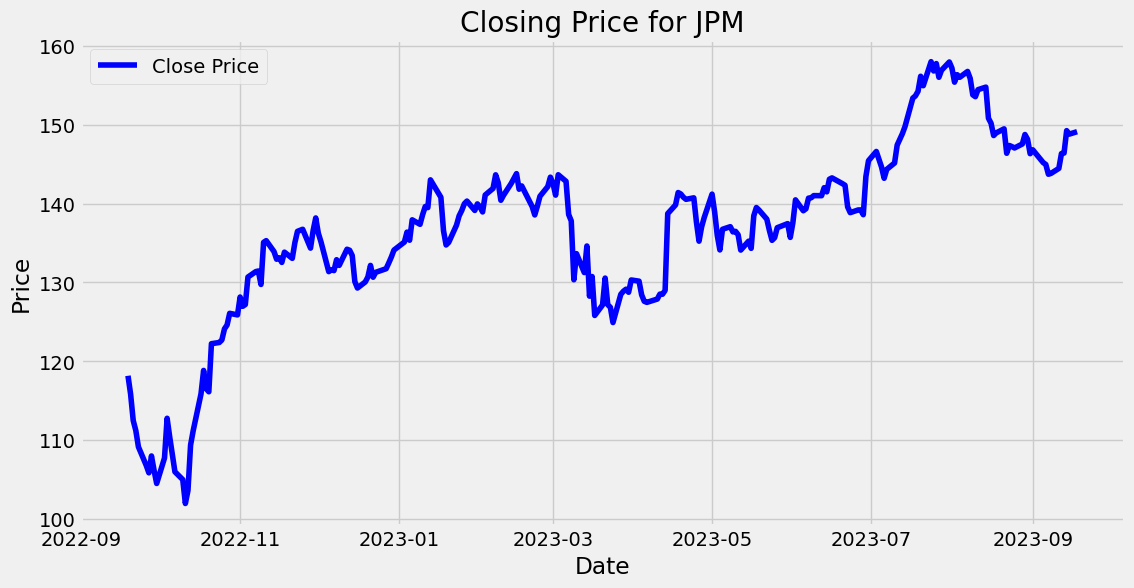

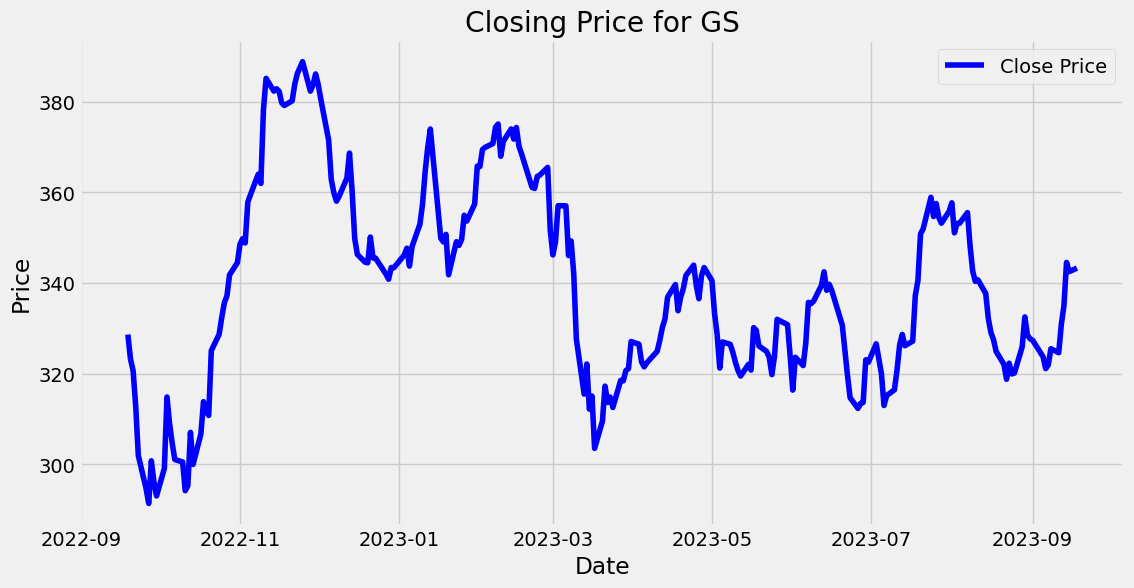

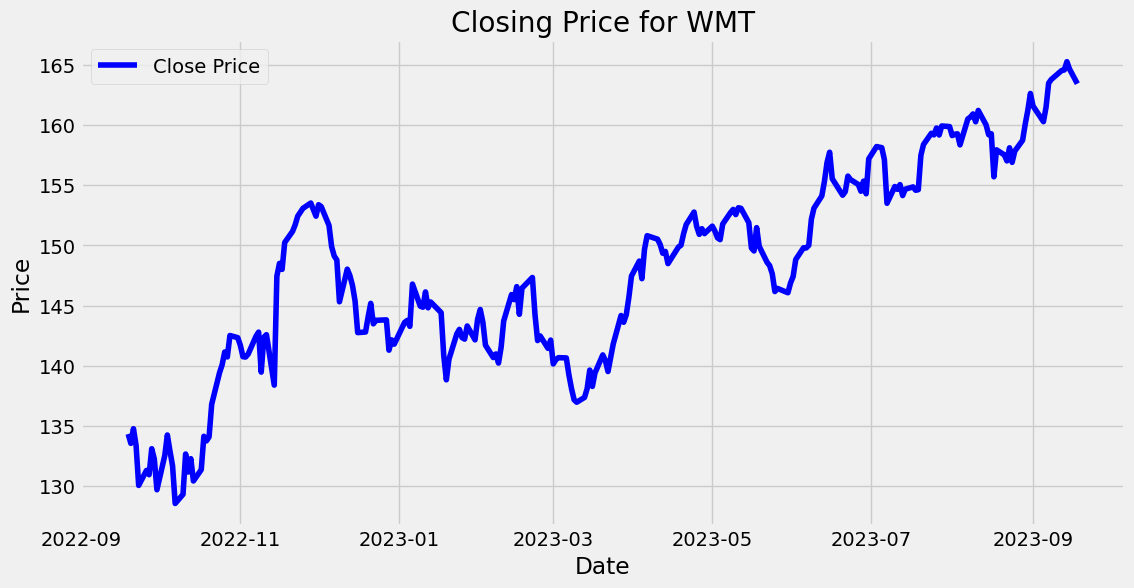

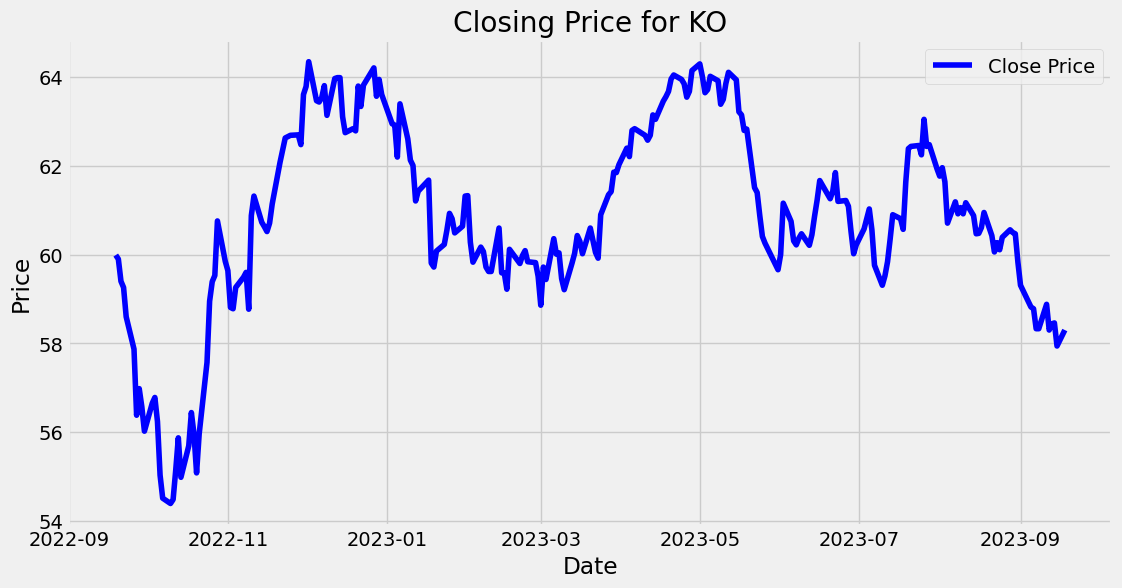

In [7]:
# Calculate daily returns for each company
# Calculate daily returns for each company
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Closing Price for {symbol}')
    plt.grid(True)
    plt.show()

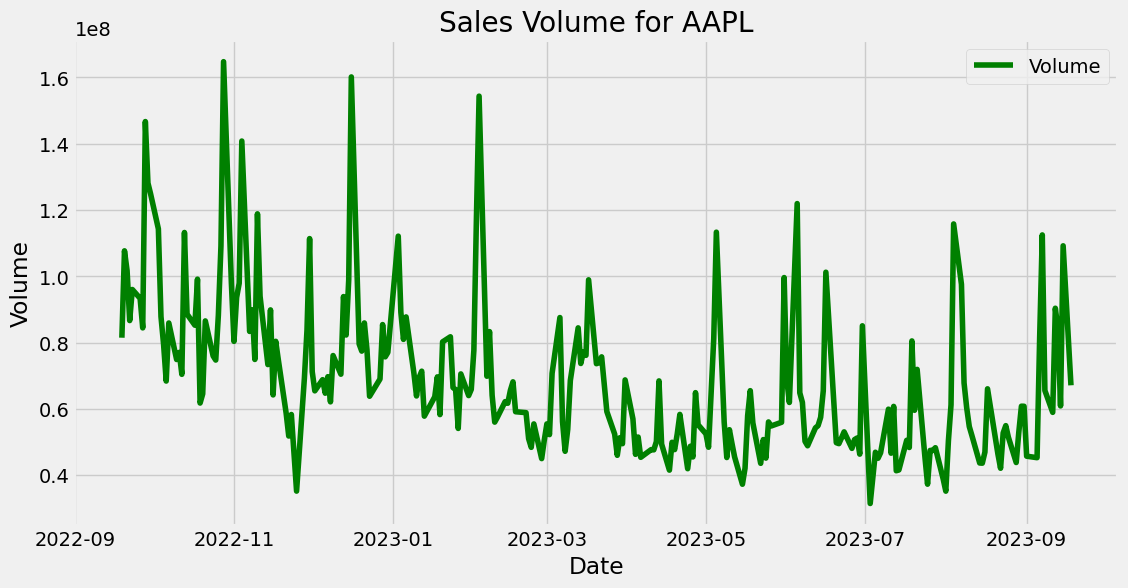

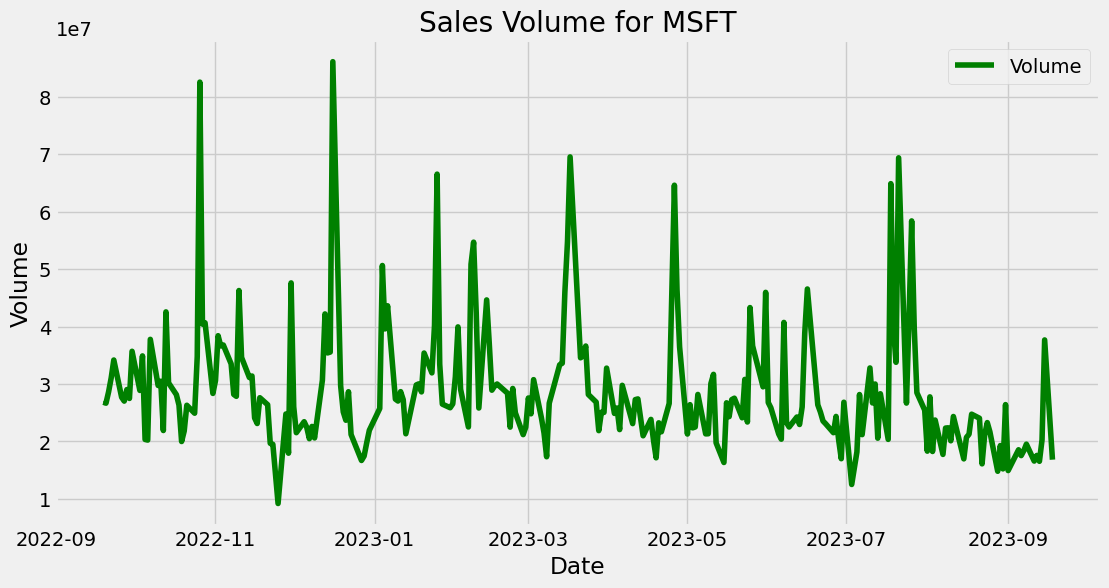

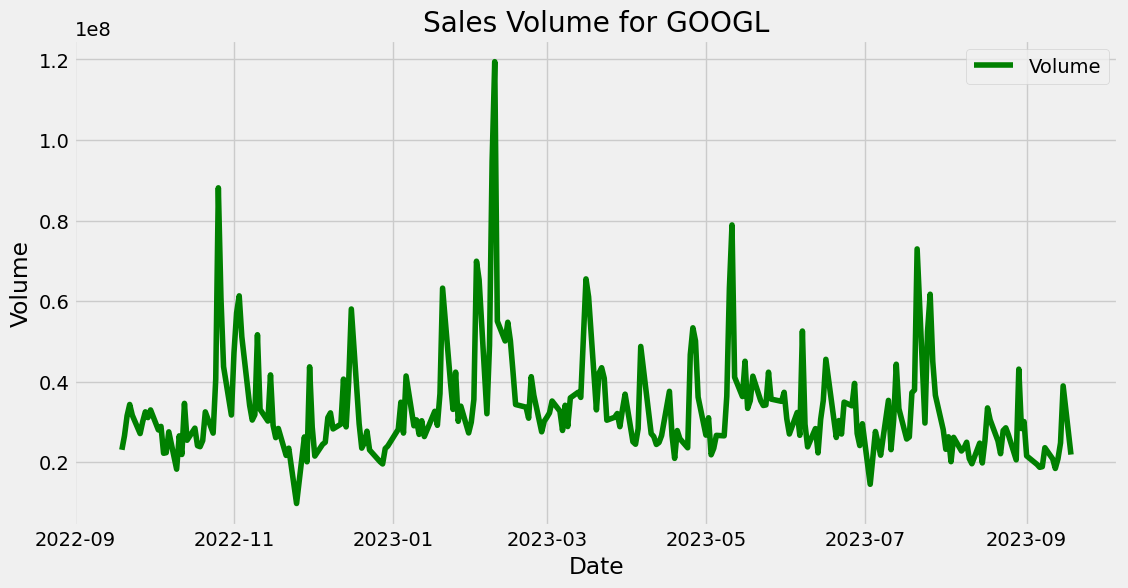

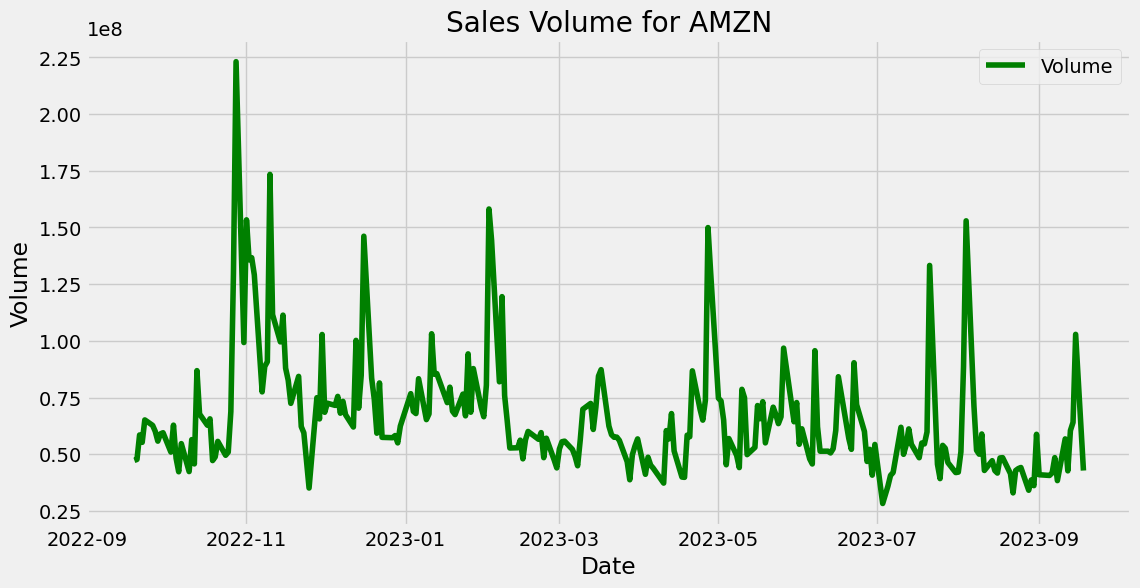

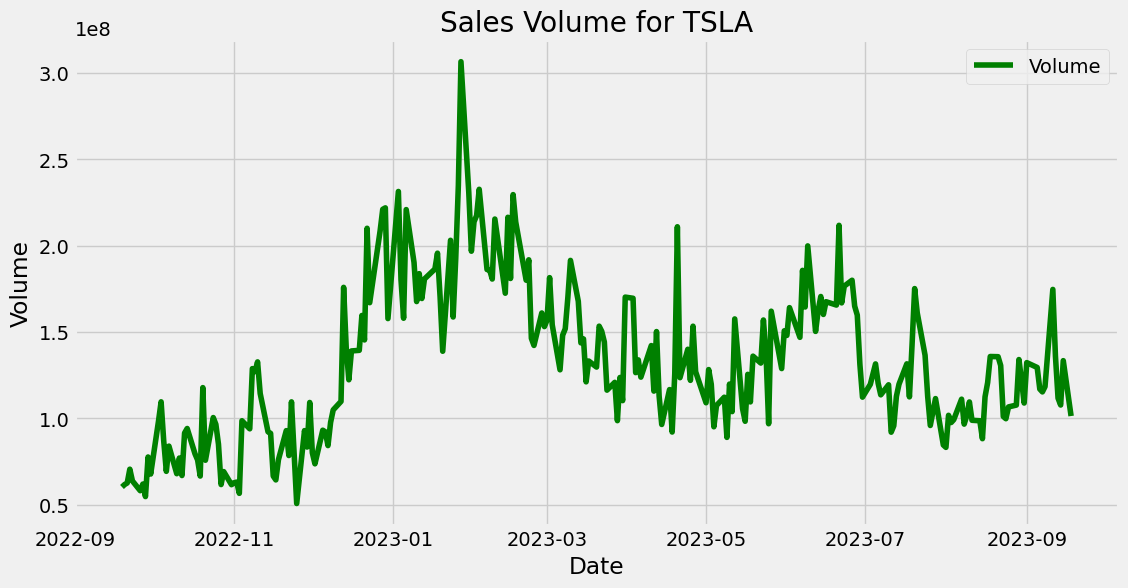

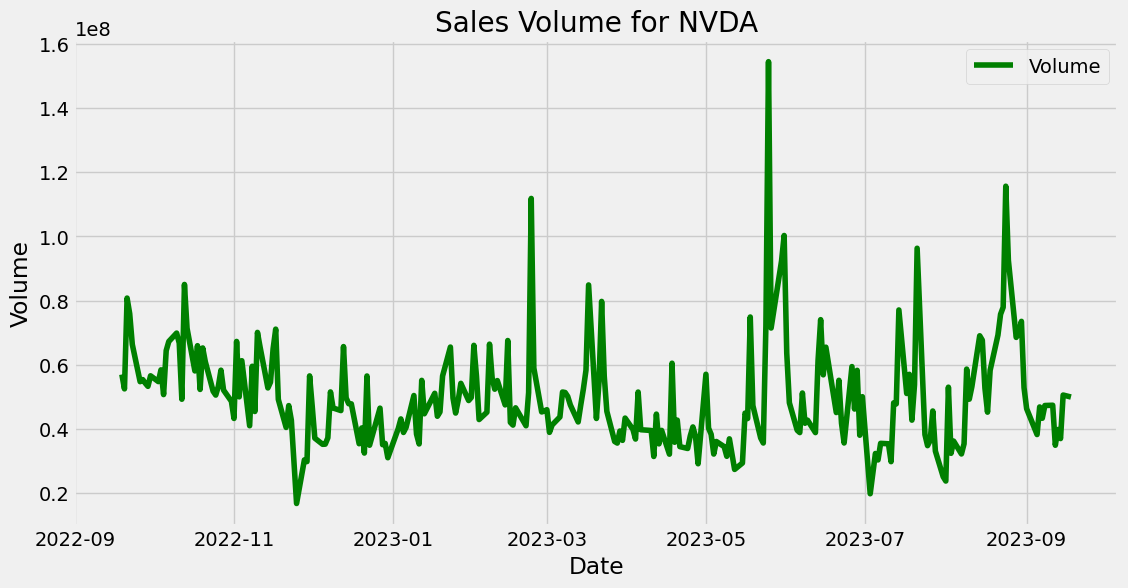

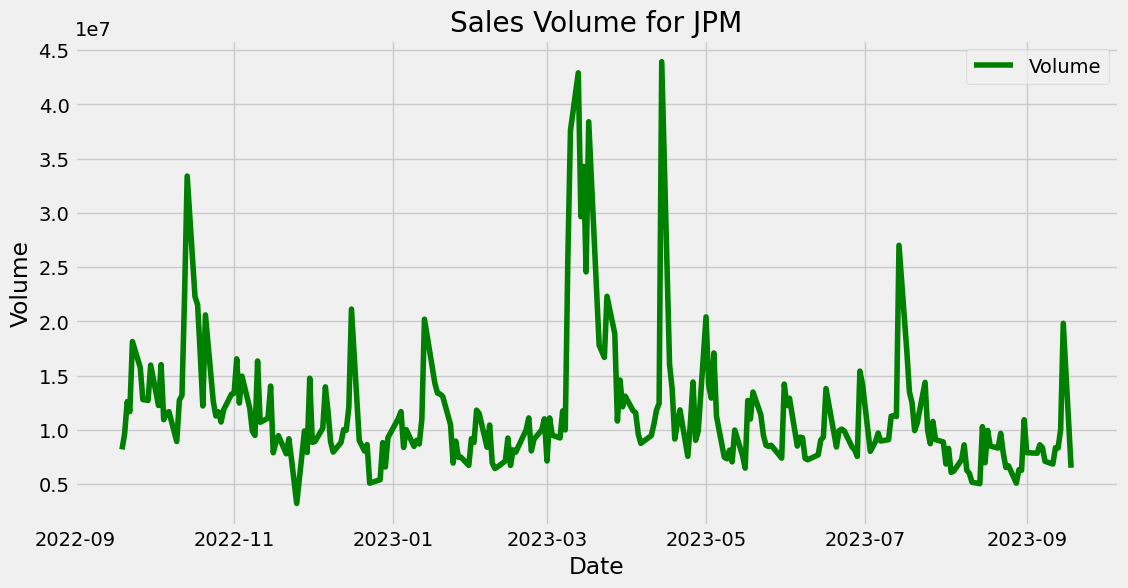

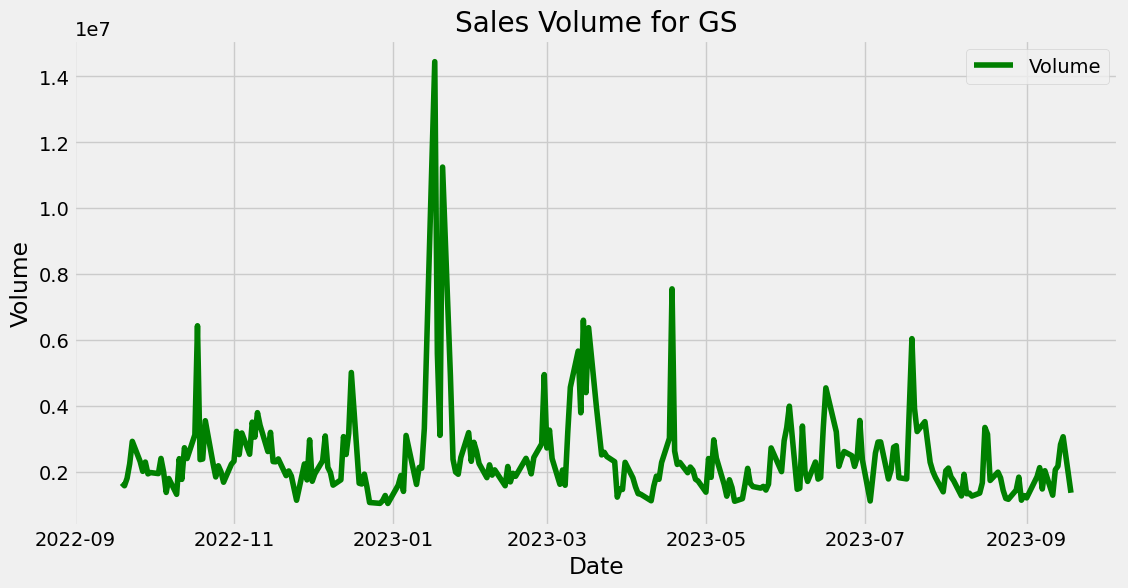

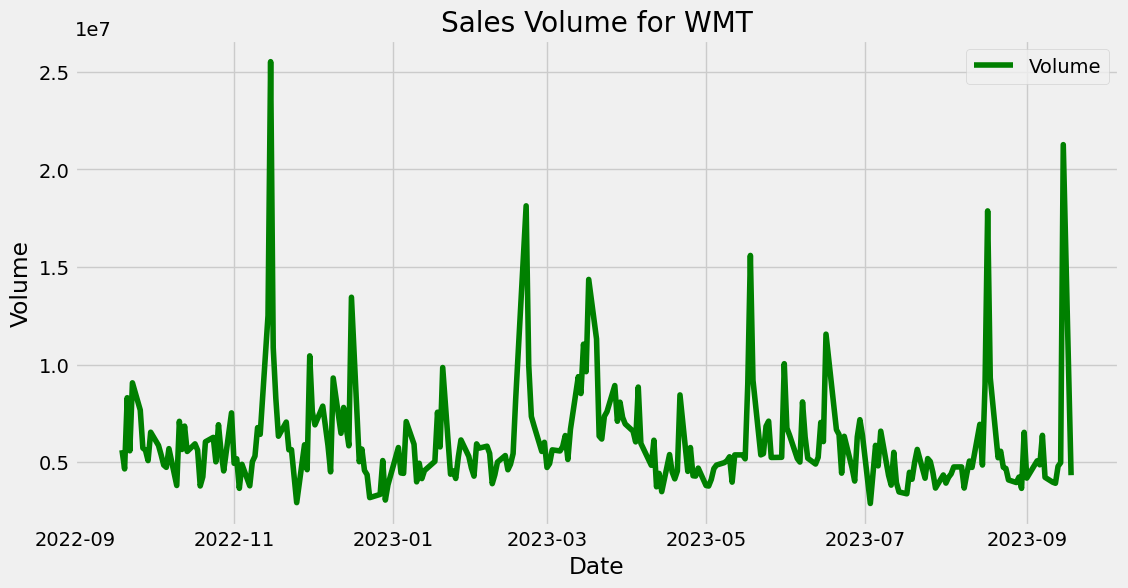

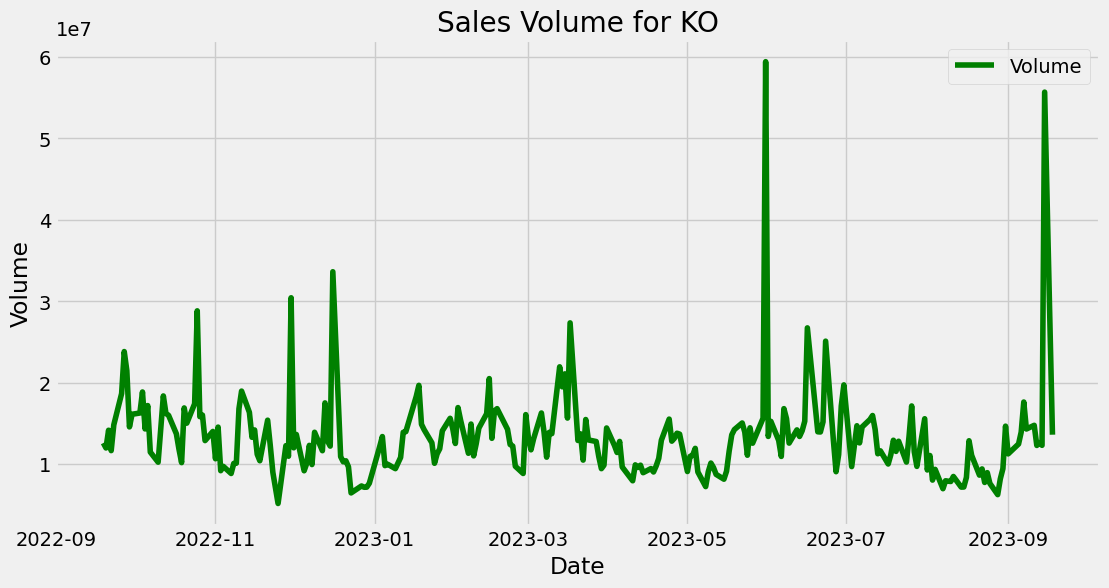

In [8]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Volume', color='green')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.title(f'Sales Volume for {symbol}')
    plt.grid(True)
    plt.show()

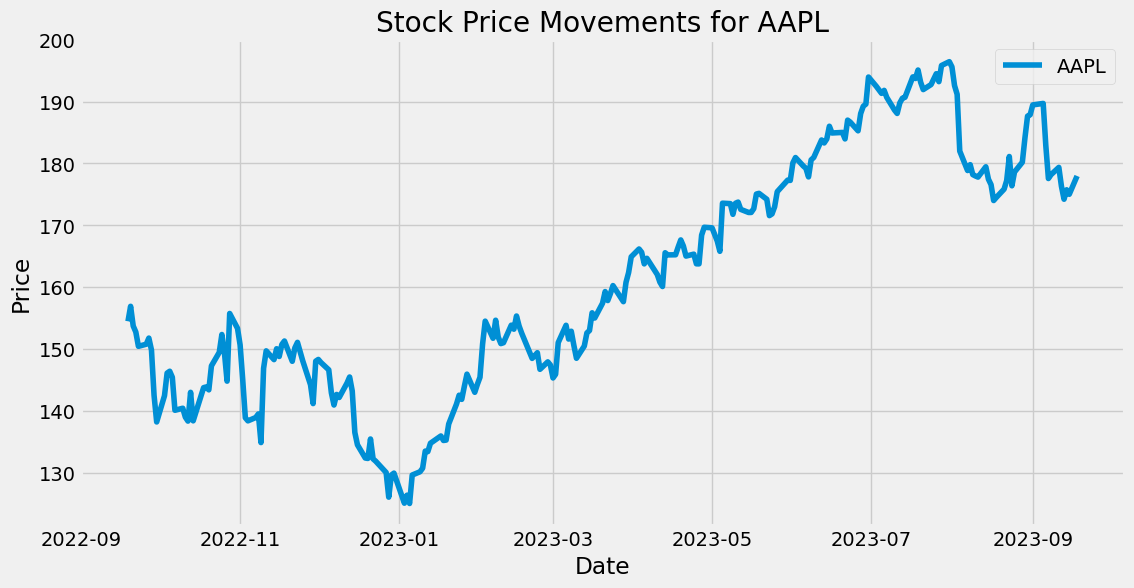

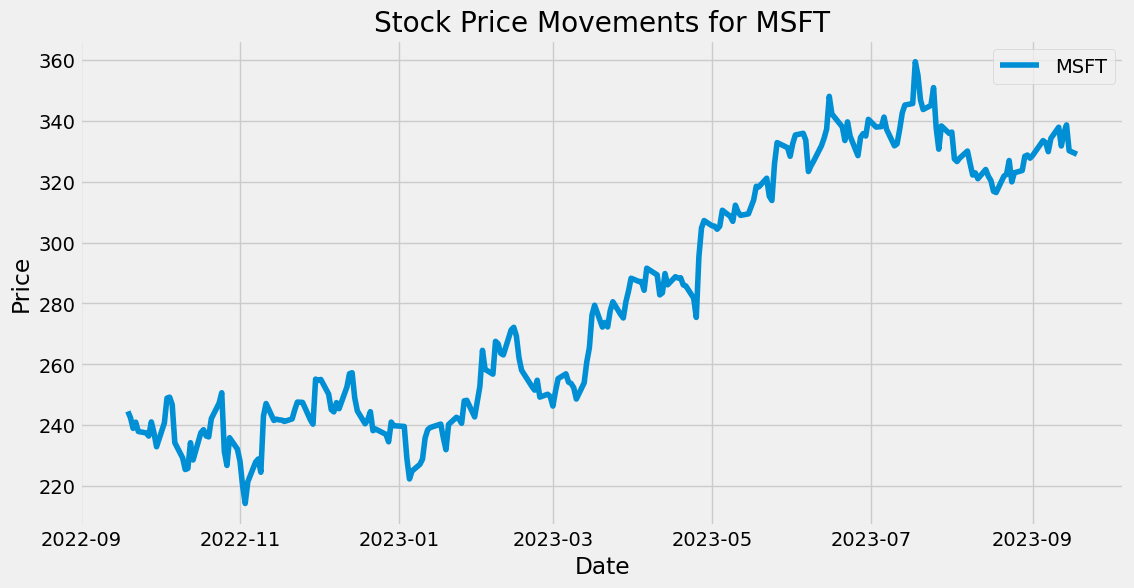

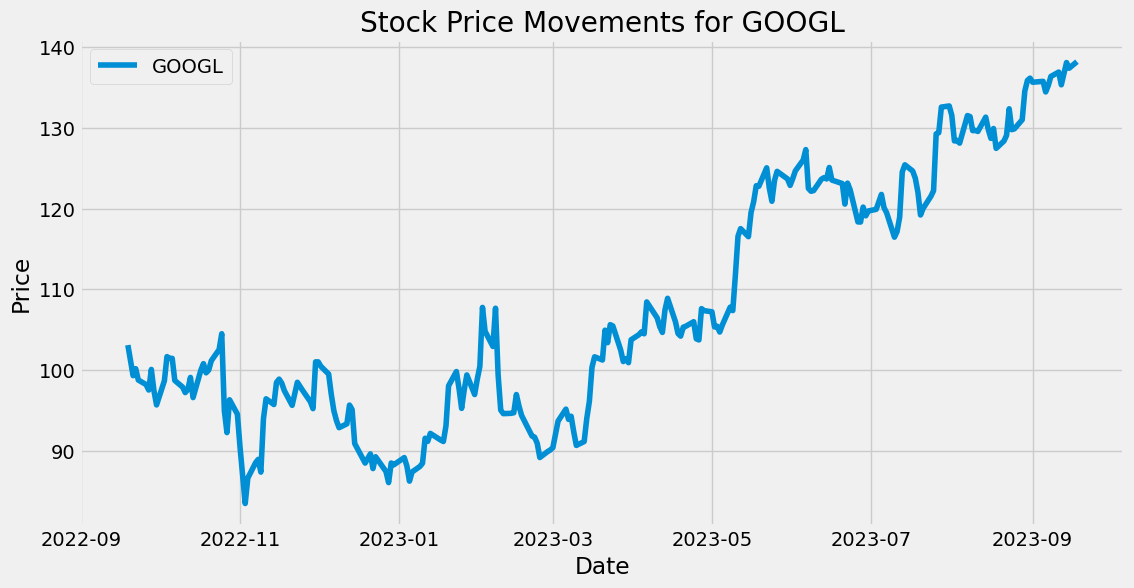

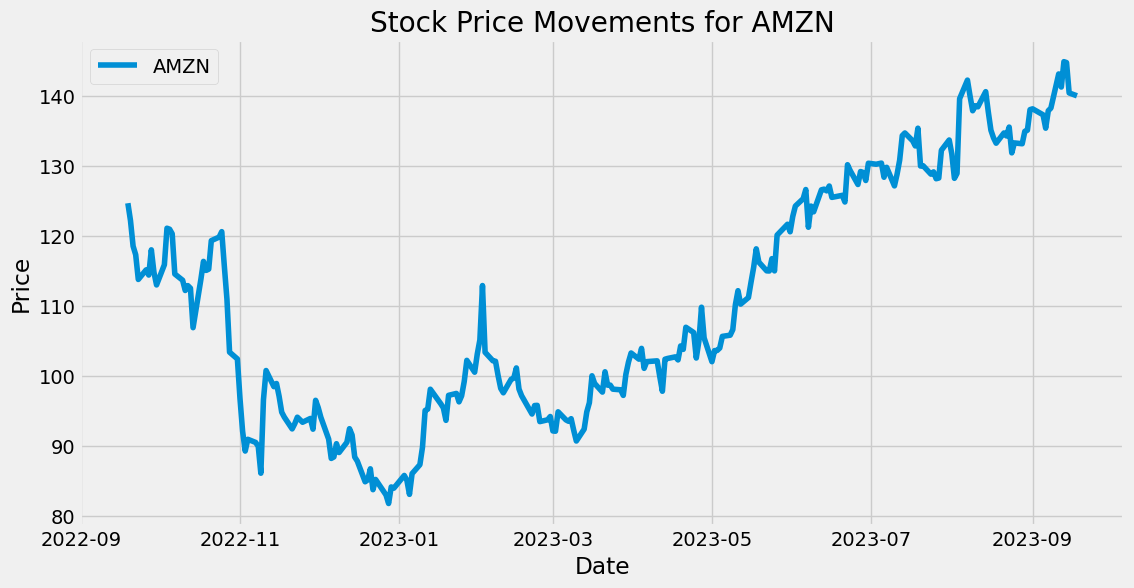

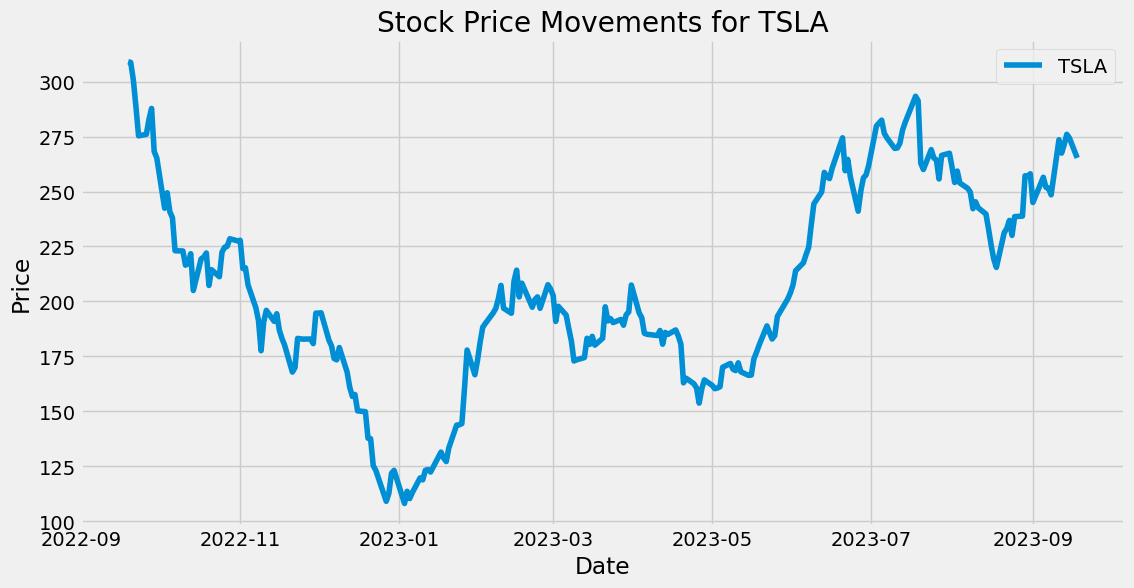

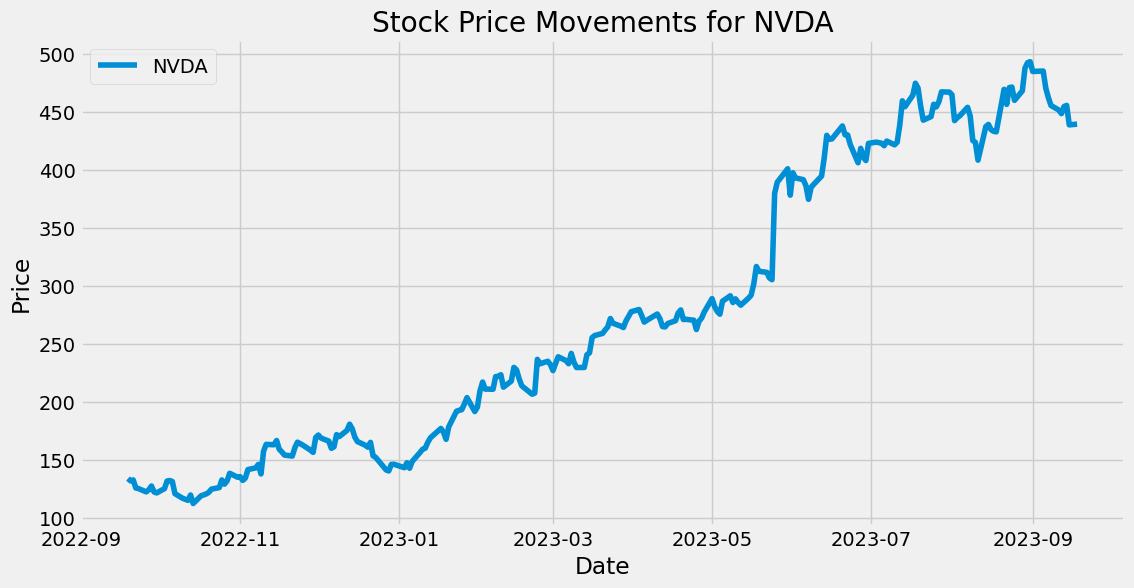

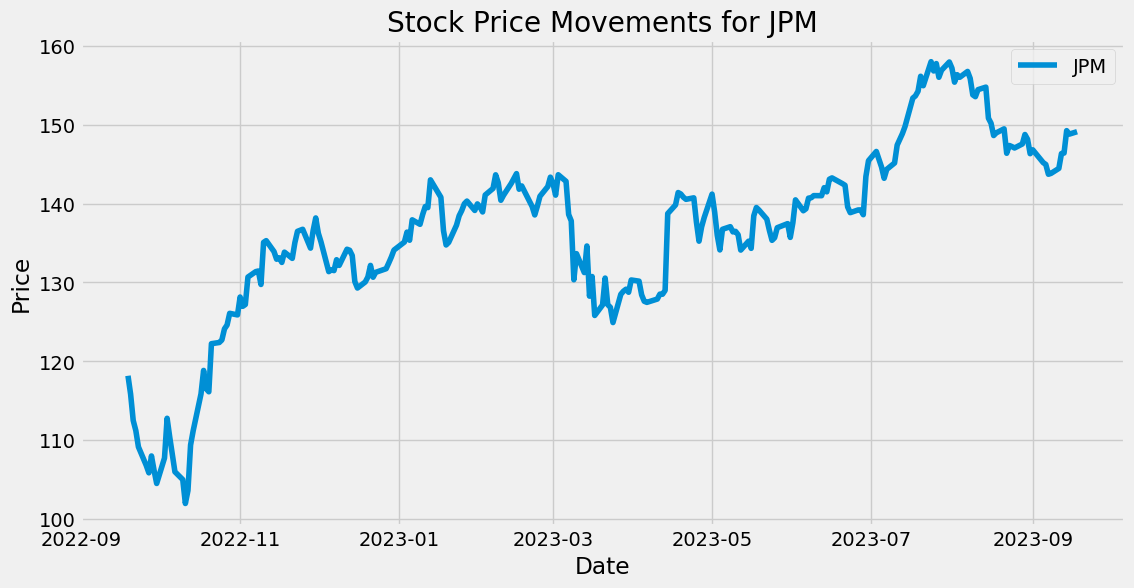

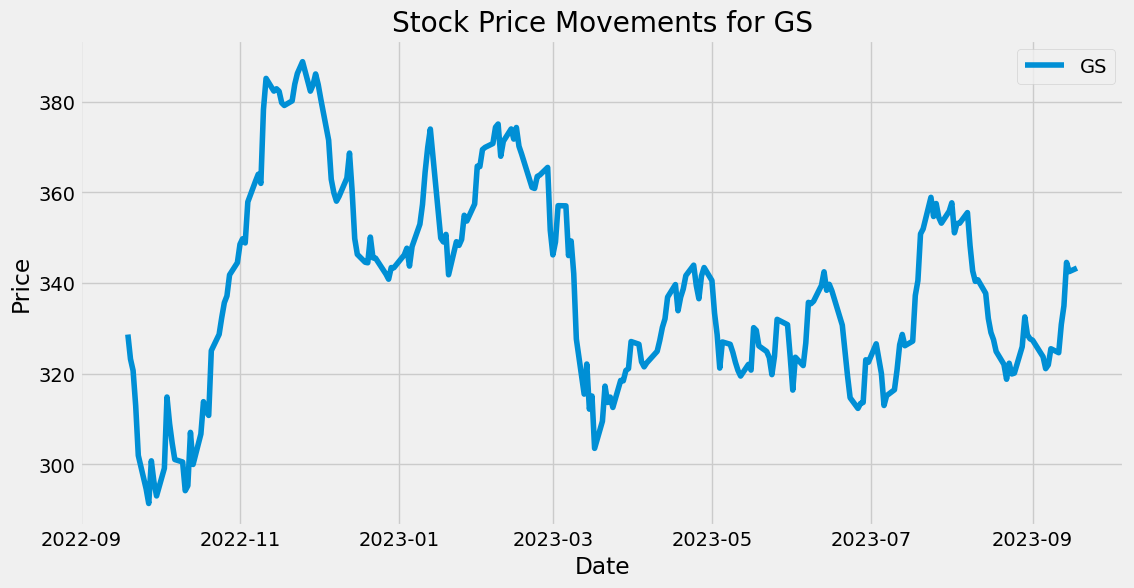

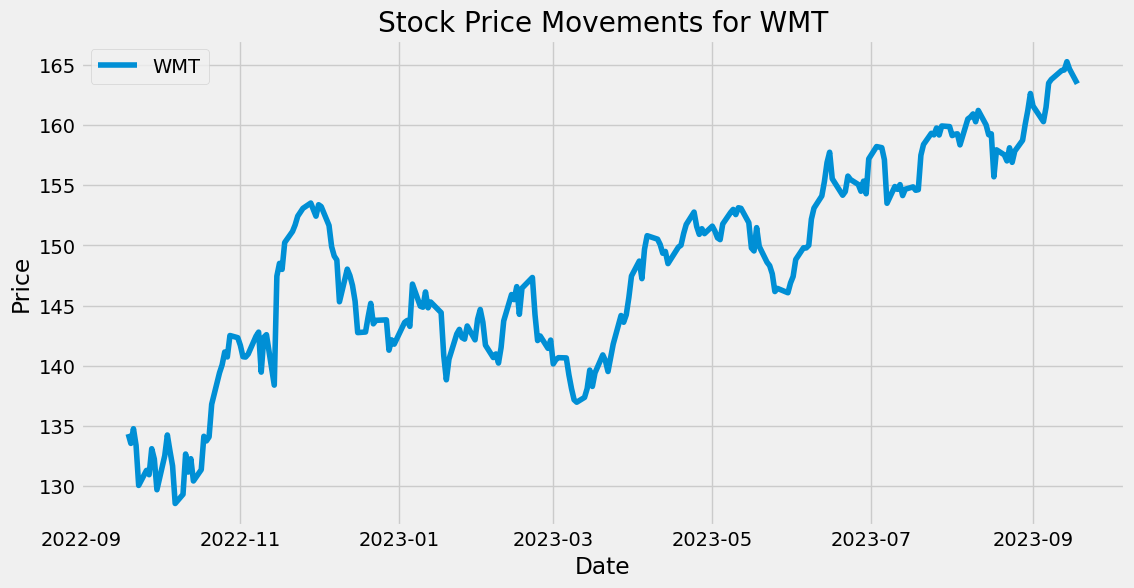

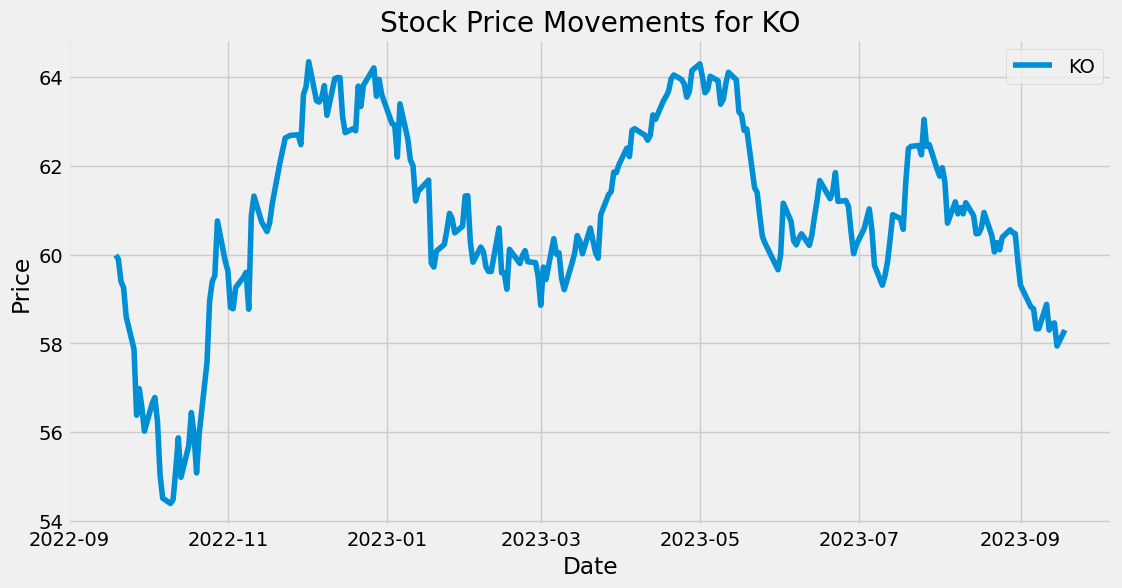

In [9]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label=symbol)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Stock Price Movements for {symbol}')
    plt.grid(True)
    plt.show()

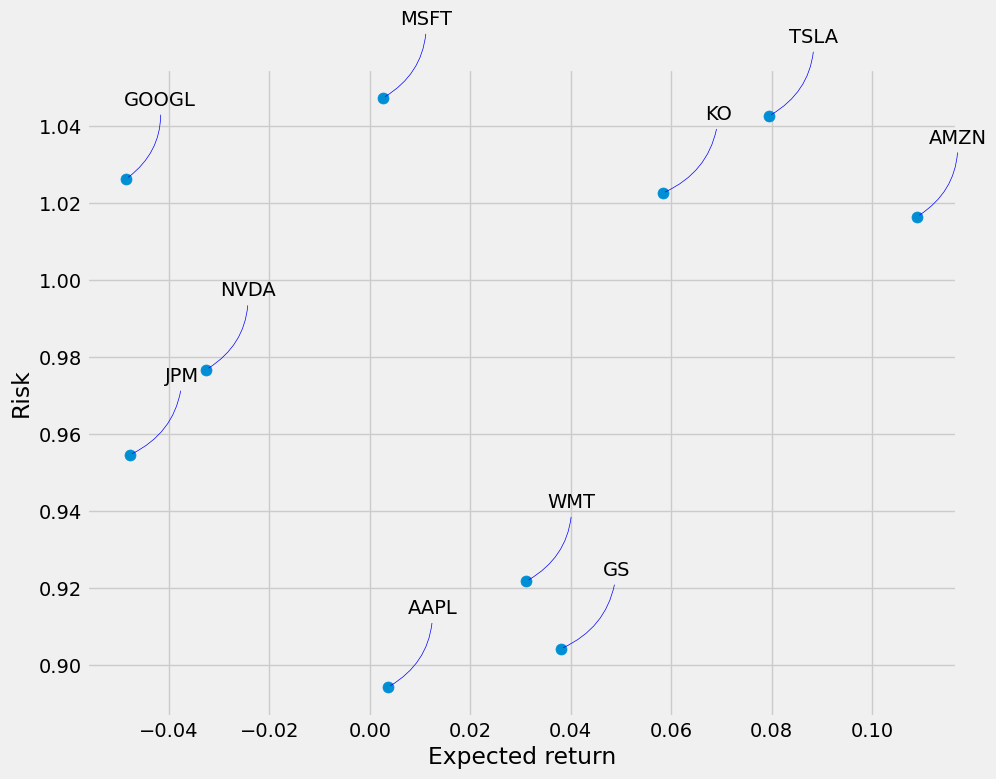

In [10]:
# Generate random data as a placeholder for tech_rets
np.random.seed(42)
data = np.random.randn(100, 10)
tech_rets = pd.DataFrame(data, columns=['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'JPM', 'GS', 'WMT', 'KO'])

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()

In [11]:
for symbol, model in company_models.items():
    latest_closing_price = company_data[symbol]['Close'].iloc[-1]
    latest_data = pd.DataFrame({'Close': [latest_closing_price]})
    predicted_price = model.predict(latest_data)
    print(f"Predicted Price for {symbol} on the next day: {predicted_price[0]}")

Predicted Price for AAPL on the next day: 177.9724366251199
Predicted Price for MSFT on the next day: 328.91085912117927
Predicted Price for GOOGL on the next day: 138.28767602077062
Predicted Price for AMZN on the next day: 139.5733507401104
Predicted Price for TSLA on the next day: 263.2274237201304
Predicted Price for NVDA on the next day: 440.7797502890931
Predicted Price for JPM on the next day: 149.0448499660469
Predicted Price for GS on the next day: 343.0121691354497
Predicted Price for WMT on the next day: 163.33246638775253
Predicted Price for KO on the next day: 58.26406856874477
